In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AI/ML/Groceries/Groceries.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = df.T

df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834
0,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables,whole milk,rolls/buns,other vegetables,pot plants,whole milk,...,chicken,citrus fruit,frankfurter,sausage,tropical fruit,sausage,cooking chocolate,chicken,semi-finished bread,chicken
1,semi-finished bread,yogurt,NaN,yogurt,whole milk,butter,NaN,UHT-milk,NaN,cereals,...,hamburger meat,herbs,tropical fruit,butter,other vegetables,chicken,NaN,citrus fruit,bottled water,tropical fruit
2,margarine,coffee,NaN,cream cheese,condensed milk,yogurt,NaN,rolls/buns,NaN,NaN,...,citrus fruit,other vegetables,other vegetables,rolls/buns,domestic eggs,beef,NaN,other vegetables,soda,other vegetables
3,ready soups,NaN,NaN,meat spreads,long life bakery product,rice,NaN,bottled beer,NaN,NaN,...,root vegetables,dessert,whole milk,pickled vegetables,zwieback,hamburger meat,NaN,butter,bottled beer,vinegar
4,NaN,NaN,NaN,NaN,NaN,abrasive cleaner,NaN,liquor (appetizer),NaN,NaN,...,other vegetables,sugar,frozen meals,soda,ketchup,citrus fruit,NaN,yogurt,NaN,shopping bags
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,cream cheese,shopping bags,rolls/buns,fruit/vegetable juice,soda,grapes,NaN,frozen dessert,NaN,NaN


In [3]:
transactions =  df.apply(lambda x: x.dropna().tolist())

transactions

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [4]:
transactions = transactions.tolist()
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk'

In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te_model = te.fit(transactions)

rows = te_model.transform(transactions)

df_transactions = pd.DataFrame(rows, columns=te_model.columns_)
print(df_transactions.shape)

(9835, 169)


In [6]:
df_transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets,length
0,0.008033,(Instant food products),1
1,0.033452,(UHT-milk),1
2,0.017692,(baking powder),1
3,0.052466,(beef),1
4,0.033249,(berries),1
...,...,...,...
996,0.005186,"(whipped/sour cream, root vegetables, whole mi...",4
997,0.007829,"(root vegetables, yogurt, whole milk, other ve...",4
998,0.007626,"(other vegetables, yogurt, whole milk, tropica...",4
999,0.005592,"(whipped/sour cream, yogurt, whole milk, other...",4


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [8]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)

rules = rules.sort_values(['confidence'], ascending =[False])

rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
53,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,1.0,0.003616,2.481613,0.640185,0.022073,0.597036,0.361142
45,"(pip fruit, root vegetables, other vegetables)",(whole milk),0.008134,0.255516,0.005491,0.675000,2.641713,1.0,0.003412,2.290720,0.626554,0.021268,0.563456,0.348244
10,"(butter, whipped/sour cream)",(whole milk),0.010168,0.255516,0.006711,0.660000,2.583008,1.0,0.004113,2.189659,0.619150,0.025913,0.543308,0.343132
35,"(pip fruit, whipped/sour cream)",(whole milk),0.009253,0.255516,0.005999,0.648352,2.537421,1.0,0.003635,2.117126,0.611558,0.023183,0.527662,0.335915
11,"(butter, yogurt)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,1.0,0.005613,2.061648,0.608978,0.035867,0.514951,0.337749
8,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,1.0,0.004936,2.055423,0.607217,0.031653,0.513482,0.335014
18,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,1.0,0.003883,2.032240,0.602956,0.025098,0.507932,0.329565
41,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,1.0,0.004025,2.199566,0.700899,0.029442,0.545365,0.331643
46,"(pip fruit, yogurt, other vegetables)",(whole milk),0.008134,0.255516,0.005084,0.625000,2.446031,1.0,0.003005,1.985291,0.596023,0.019662,0.496295,0.322448
23,"(pip fruit, domestic eggs)",(whole milk),0.008643,0.255516,0.005389,0.623529,2.440275,1.0,0.003181,1.977536,0.595356,0.020825,0.494320,0.322310


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

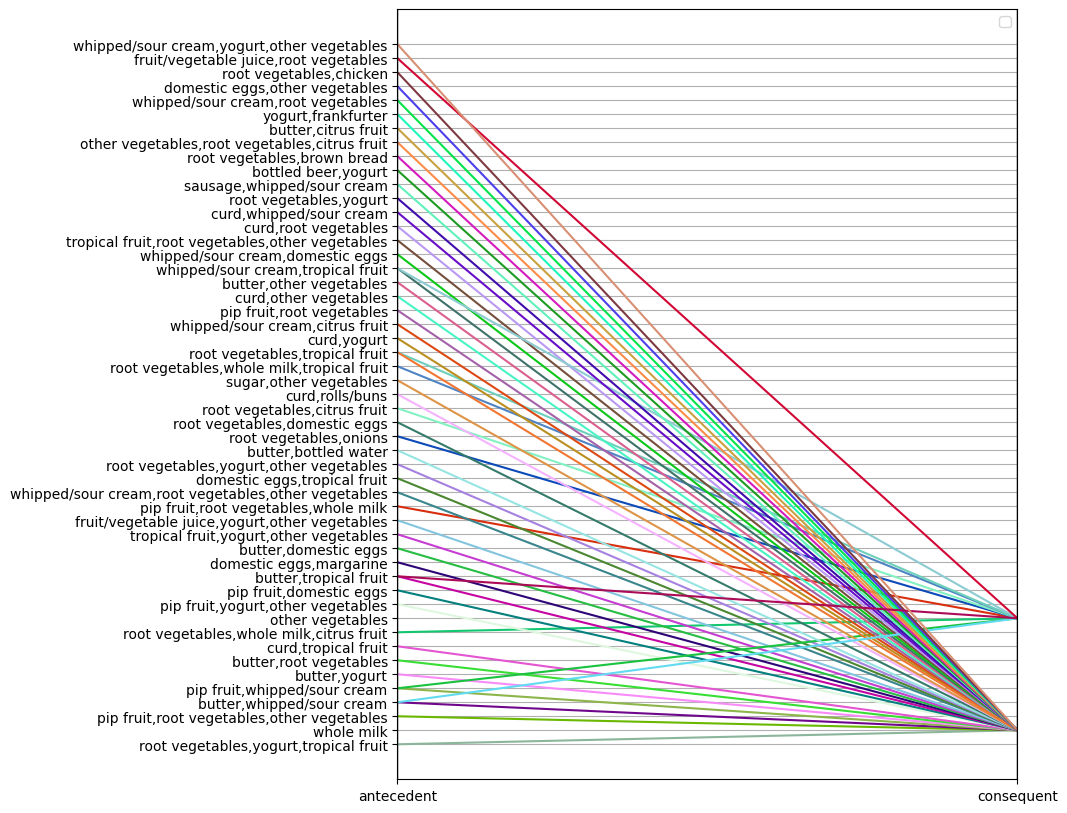

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

rules['antecedent'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))

rules['consequent'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules['rule_n'] = rules.index

coords=rules[['antecedent','consequent','rule_n']]

plt.figure(figsize=(8,10))

parallel_coordinates(coords, 'rule_n')

plt.legend([])

plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

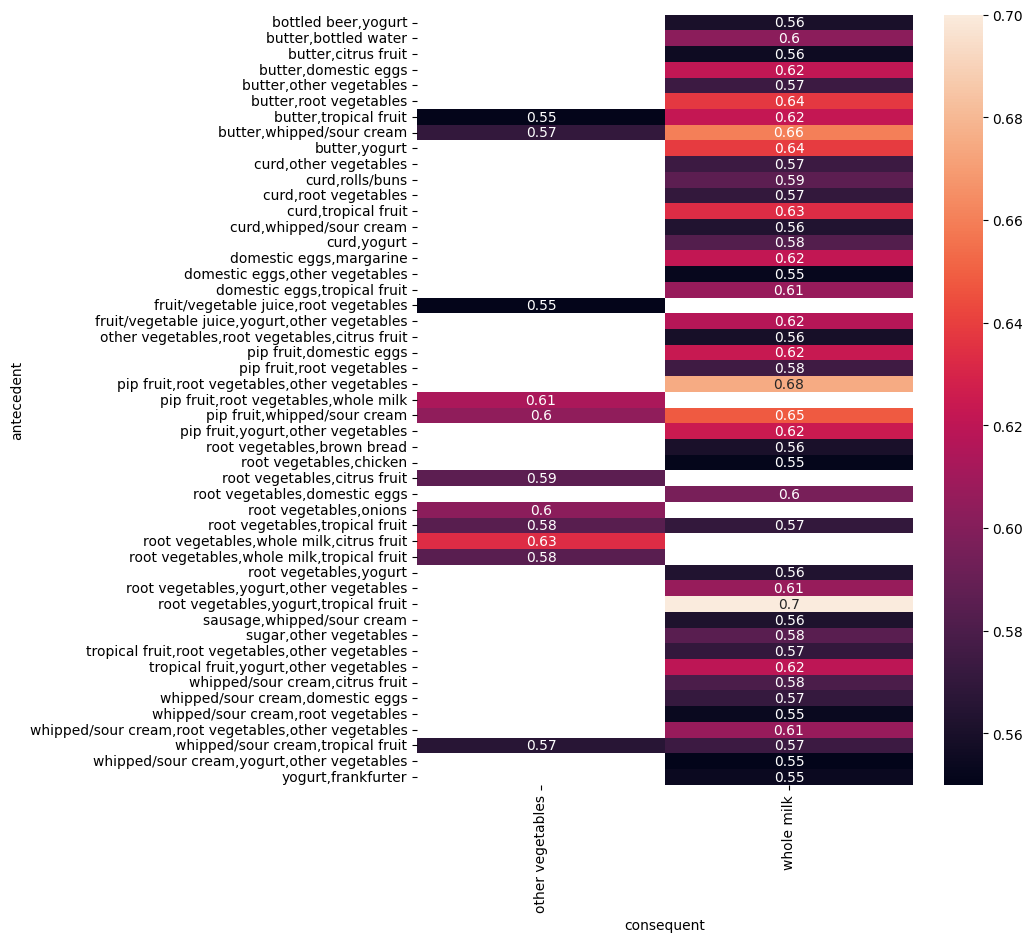

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
import seaborn as sns

pivot = rules.pivot(index = 'antecedent', columns = 'consequent', values= 'confidence')

plt.figure(figsize=(8,10))

sns.heatmap(pivot, annot = True)

plt.yticks(rotation=0)

plt.xticks(rotation=90)
plt.show()

In [11]:
def predict(items, rules, max_results= 6):

    preds = rules[rules['antecedents'] == items]

    preds = preds[['consequent','confidence']]

    preds.sort_values('confidence', ascending=False)

    return preds[:max_results]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [12]:
preds = predict({'yogurt', 'tropical fruit', 'other vegetables'}, rules)
preds

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,consequent,confidence
51,whole milk,0.619835


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
